In [1]:
from gymnasium.wrappers import TimeLimit
from matplotlib.animation import ArtistAnimation
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from exp.di.mujoco_exp.learning._2_crawler._0_random_target.crawler import WalkToTargetEnv

/opt/homebrew/Caskroom/miniforge/base/envs/rl/lib/python3.9/site-packages/gymnasium/envs/registration.py:845: UserWarning: WARN: Overriding environment GymV26Environment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [6]:
class OscillatorAgent:
    def __init__(self, env):
        self.n = env.action_space.shape[0]
        self.dt = 0.1
        self.frequencies = np.ones((self.n,)) * 2  # (n,)
        
        # self.phases = np.linspace(start=0, stop=2 * np.pi, num=self.n)  # (n,)
        self.phases = np.zeros((self.n,))  # (n,)
        
        hip_frequencies = self.frequencies[0::2]
        knee_frequencies = self.frequencies[1::2]
        # hip_frequencies *= 0
        
        hip_phases = self.phases[0::2]
        knee_phases = self.phases[1::2]
        knee_phases[:len(knee_phases)//2] = -np.pi / 2
        
    def __call__(self):
        value = np.sin(self.phases)

        d_phase = self.frequencies  # <-- vanilla oscillators way
        self.phases += d_phase * self.dt
        print(f'{self.phases=}')
        
        # Scale them to 0-1
        value = (value + 1) / 2

        return value

self.phases=array([ 0.2       , -1.37079633,  0.2       , -1.37079633,  0.2       ,
        0.2       ,  0.2       ,  0.2       ])
self.phases=array([ 0.4       , -1.17079633,  0.4       , -1.17079633,  0.4       ,
        0.4       ,  0.4       ,  0.4       ])
self.phases=array([ 0.6       , -0.97079633,  0.6       , -0.97079633,  0.6       ,
        0.6       ,  0.6       ,  0.6       ])
self.phases=array([ 0.8       , -0.77079633,  0.8       , -0.77079633,  0.8       ,
        0.8       ,  0.8       ,  0.8       ])
self.phases=array([ 1.        , -0.57079633,  1.        , -0.57079633,  1.        ,
        1.        ,  1.        ,  1.        ])
self.phases=array([ 1.2       , -0.37079633,  1.2       , -0.37079633,  1.2       ,
        1.2       ,  1.2       ,  1.2       ])
self.phases=array([ 1.4       , -0.17079633,  1.4       , -0.17079633,  1.4       ,
        1.4       ,  1.4       ,  1.4       ])
self.phases=array([1.6       , 0.02920367, 1.6       , 0.02920367, 1.6       ,
    

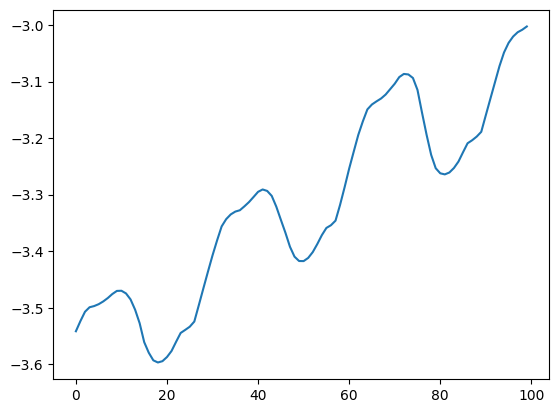

(100, 8)


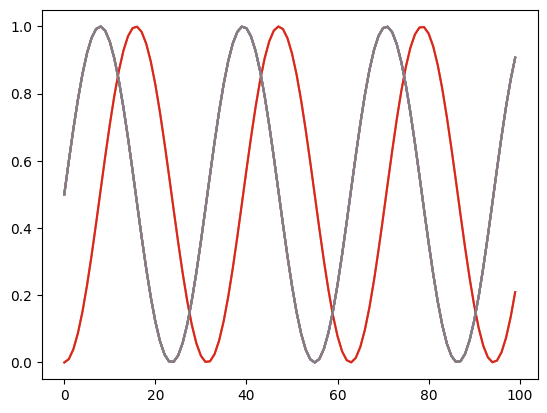

In [7]:
time_limit = 100
env = WalkToTargetEnv(n_legs=4)
env = TimeLimit(env, time_limit)
agent = OscillatorAgent(env)

frames = []
fig = plt.figure()
framerate = 30
actions = []
rewards = []

env.reset()
while True:
    frames.append([plt.imshow(env.render(), cmap=cm.Greys_r, animated=True)])
    
    # action = env.action_space.sample()
    action = agent()
    actions.append(action)
    obs, reward, terminated, truncated, _ = env.step(action)
    
    rewards.append(reward)
    if truncated or terminated:
        break

ArtistAnimation(fig, frames, interval=1000 / framerate, blit=True, repeat_delay=1000).save("crawler.mp4")
plt.close()

plt.plot(rewards)
plt.show()

actions = np.array(actions)
print(actions.shape)  # (t, n)
for i in range(actions.shape[1]):
    plt.plot(actions[:, i])
plt.show()